In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime
import seaborn as sns
import squarify

%matplotlib inline

### Data Understanding

In [2]:
data = pd.read_csv("2019-Nov.csv")
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [3]:
data.shape

(67501979, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67501979 entries, 0 to 67501978
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB


In [5]:
data.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

### Know your Customers

In [6]:
visitor = data['user_id'].nunique()
print ("visitors: {}".format(visitor))

visitors: 3696117


### Vistors Daily Trend

In [7]:
def convert_time_to_date(utc_timestamp):  
    utc_date = datetime.strptime(utc_timestamp[0:10], '%Y-%m-%d').date()
    return utc_date    

In [8]:

data['event_date'] = data['event_time'].apply(lambda s: convert_time_to_date(s))
visitor_by_date = data[['event_date','user_id']].drop_duplicates().groupby(['event_date'])['user_id'].agg(['count']).sort_values(by=['event_date'], ascending=True)

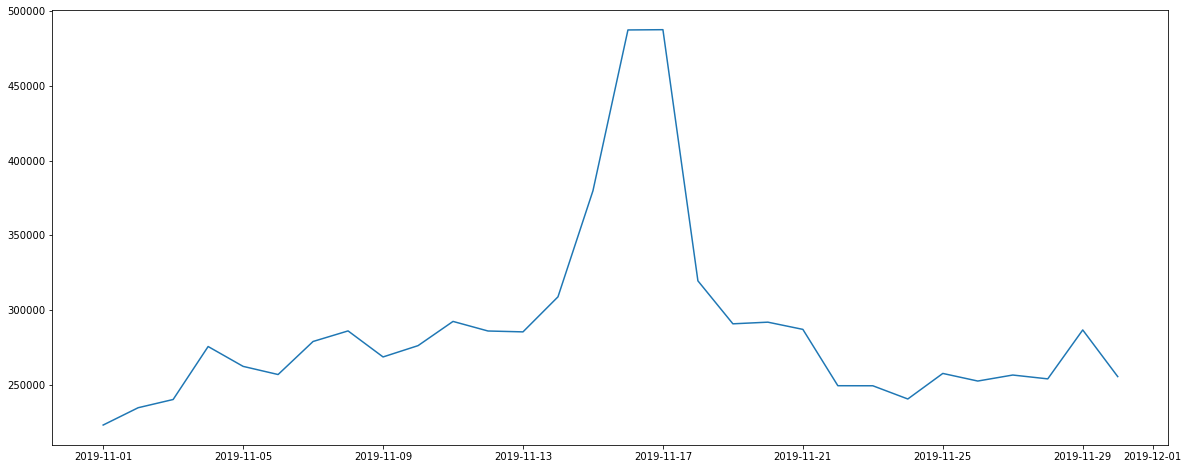

In [9]:
x = pd.Series(visitor_by_date.index.values)
y = visitor_by_date['count']
plt.rcParams['figure.figsize'] = (20,8)

plt.plot(x,y)
plt.show()

### Price Daily Trend

In [10]:
product_id = 1003461 # Enter product_id
data[data['product_id'] == product_id][['category_code','brand']].head(1)

,category_code,brand
0,electronics.smartphone,xiaomi


In [11]:
product_daily_price = data.loc[data['product_id'] == product_id,['event_date','price']].groupby(['event_date']).mean()
product_daily_price = data[['event_date','price']].groupby(['event_date']).mean()

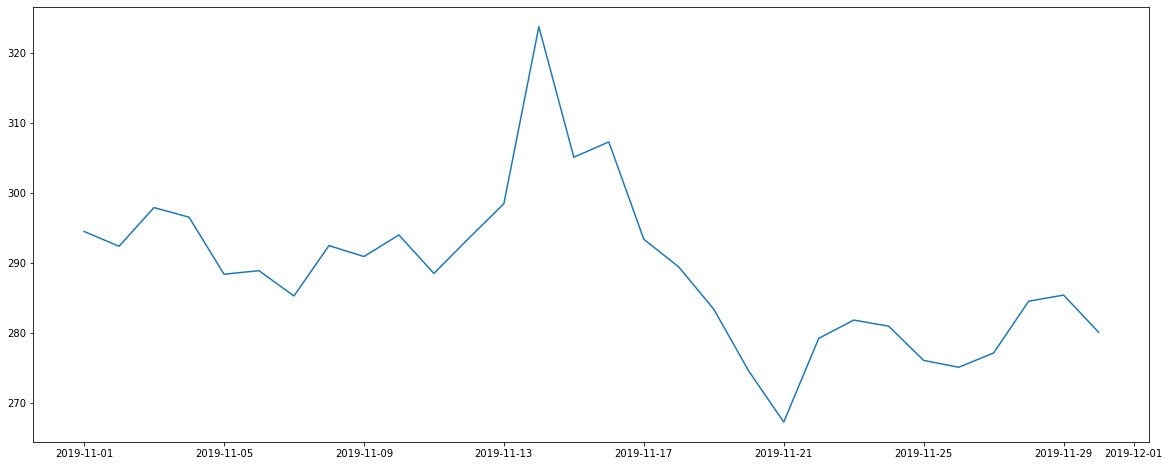

In [12]:
x = pd.Series(product_daily_price.index.values)
y = product_daily_price['price']
plt.rcParams['figure.figsize'] = (20,8)

plt.plot(x,y)
plt.show()

### By Category and Product 

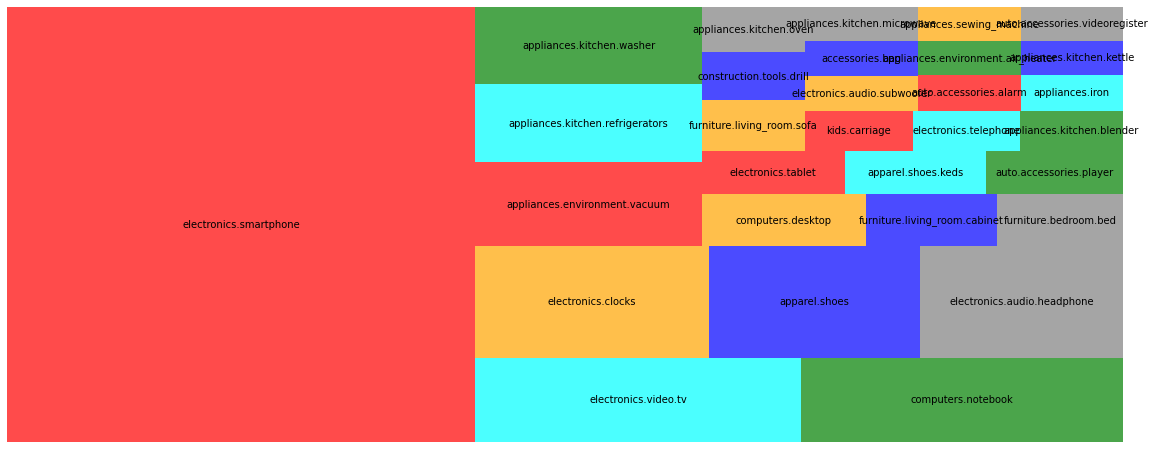

In [13]:
top_category_n = 30
top_category = data['category_code'].value_counts()[:top_category_n].sort_values(ascending=False)
df = pd.DataFrame({'count':top_category, 'top_category':top_category })

squarify.plot(sizes=top_category, label=top_category.index.array, color=["red","cyan","green","orange","blue","grey"], alpha=.7  )
plt.axis('off')
plt.show()

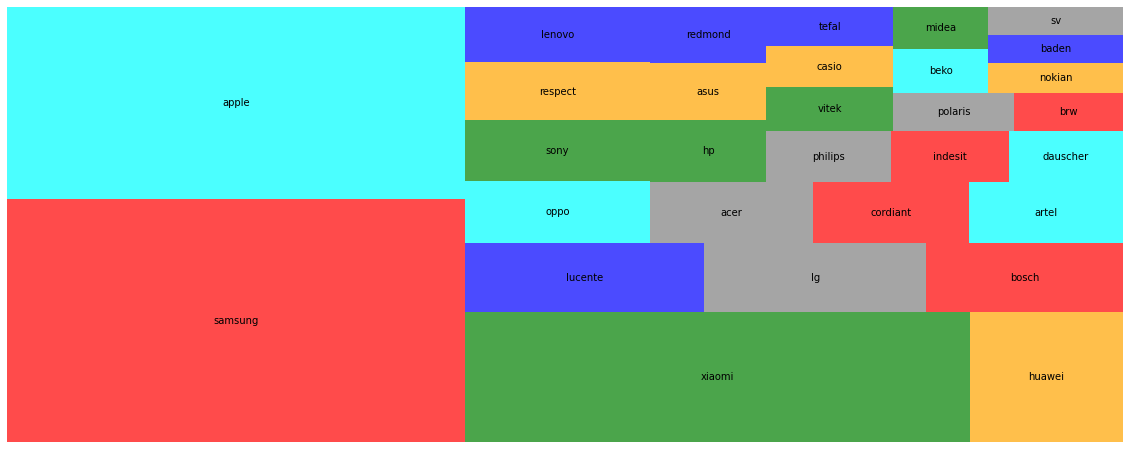

In [14]:
top_brand_n = 30
top_brand = data['brand'].value_counts()[:top_brand_n].sort_values(ascending=False)
df = pd.DataFrame({'count':top_brand, 'top_category':top_brand.index.array })

squarify.plot(sizes=top_brand, label=top_brand.index.array, color=["red","cyan","green","orange","blue","grey"], alpha=.7  )
plt.axis('off')
plt.show()

### Purchase Behavior

In [15]:
data['event_type'].value_counts()

view        63556110
cart         3028930
purchase      916939
Name: event_type, dtype: int64

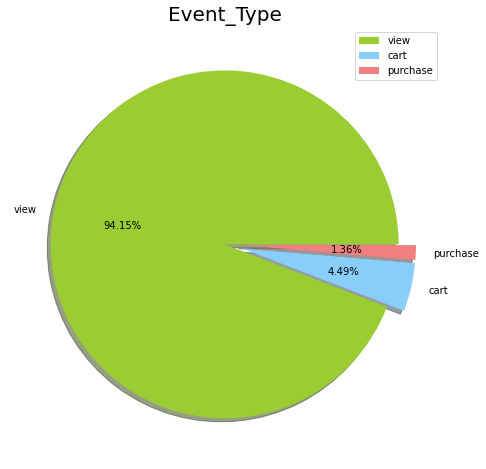

In [16]:
labels = ['view', 'cart','purchase']
size = data['event_type'].value_counts()
colors = ['yellowgreen', 'lightskyblue','lightcoral']
explode = [0, 0.1,0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Event_Type', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

#### event_type = "purchase", what item do customers buy?

In [17]:
purchase = data.loc[data['event_type'] == 'purchase']
purchase = purchase.dropna(axis='rows')
purchase

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date
168,2019-11-01 00:01:04 UTC,purchase,1005161,2053013555631882655,electronics.smartphone,xiaomi,211.92,513351129,e6b7ce9b-1938-4e20-976c-8b4163aea11d,2019-11-01
707,2019-11-01 00:04:51 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,128.42,562958505,0f039697-fedc-40fa-8830-39c1a024351d,2019-11-01
939,2019-11-01 00:06:33 UTC,purchase,1801881,2053013554415534427,electronics.video.tv,samsung,488.80,557746614,4d76d6d3-fff5-4880-8327-e9e57b618e0e,2019-11-01
942,2019-11-01 00:06:34 UTC,purchase,5800823,2053013553945772349,electronics.audio.subwoofer,nakamichi,123.56,514166940,8ef5214a-86ad-4d0b-8df3-4280dd411b47,2019-11-01
1107,2019-11-01 00:07:38 UTC,purchase,30000218,2127425436764865054,construction.tools.welding,magnetta,254.78,515240495,0253151d-5c84-4809-ba02-38ac405494e1,2019-11-01
...,...,...,...,...,...,...,...,...,...,...
67501716,2019-11-30 23:58:08 UTC,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,235.60,574868869,878a1538-ebe3-4d7f-b773-1b057b1971eb,2019-11-30
67501725,2019-11-30 23:58:14 UTC,purchase,1004874,2053013555631882655,electronics.smartphone,samsung,346.70,547804983,717566cf-ef93-4078-ba8f-169a3ac9f1a0,2019-11-30
67501745,2019-11-30 23:58:22 UTC,purchase,1005130,2053013555631882655,electronics.smartphone,apple,1437.02,515582054,829c20b5-696e-4a8a-8a9f-171014a3ecbe,2019-11-30
67501824,2019-11-30 23:58:57 UTC,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,235.60,579876821,ca50e291-43f3-4ca2-9e13-20ee6b8b25f0,2019-11-30


#### What brands the customers buy?

In [18]:
top_sellers = purchase.groupby('brand')['brand'].agg(['count']).sort_values('count', ascending=False)
top_sellers.head(20)

,count
brand,
samsung,198670
apple,165681
xiaomi,57909
huawei,23466
oppo,15080
lg,11828
artel,7269
lenovo,6546
acer,6402


In [19]:
user_session = 513351129
data.loc[data['user_id'] == user_session]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date
49,2019-11-01 00:00:17 UTC,view,1005161,2053013555631882655,electronics.smartphone,xiaomi,211.92,513351129,e6b7ce9b-1938-4e20-976c-8b4163aea11d,2019-11-01
168,2019-11-01 00:01:04 UTC,purchase,1005161,2053013555631882655,electronics.smartphone,xiaomi,211.92,513351129,e6b7ce9b-1938-4e20-976c-8b4163aea11d,2019-11-01
281,2019-11-01 00:01:57 UTC,view,1005161,2053013555631882655,electronics.smartphone,xiaomi,211.92,513351129,d3ff456e-0537-4c72-b126-752dd3e135db,2019-11-01
57932963,2019-11-25 09:44:42 UTC,view,5100562,2053013553341792533,electronics.clocks,apple,334.60,513351129,ce2941e6-f108-4876-bb76-da3981eb92e9,2019-11-25
57933375,2019-11-25 09:44:57 UTC,cart,5100562,2053013553341792533,electronics.clocks,apple,334.60,513351129,ce2941e6-f108-4876-bb76-da3981eb92e9,2019-11-25
57933966,2019-11-25 09:45:21 UTC,view,5100562,2053013553341792533,electronics.clocks,apple,334.60,513351129,ce2941e6-f108-4876-bb76-da3981eb92e9,2019-11-25
57934030,2019-11-25 09:45:23 UTC,cart,5100562,2053013553341792533,electronics.clocks,apple,334.60,513351129,ce2941e6-f108-4876-bb76-da3981eb92e9,2019-11-25
57935200,2019-11-25 09:46:11 UTC,purchase,5100562,2053013553341792533,electronics.clocks,apple,334.60,513351129,ce2941e6-f108-4876-bb76-da3981eb92e9,2019-11-25
60185950,2019-11-26 16:05:24 UTC,view,5100562,2053013553341792533,electronics.clocks,apple,334.60,513351129,543b61ca-c953-469d-95c9-71aeb2480749,2019-11-26
60188988,2019-11-26 16:06:54 UTC,cart,5100562,2053013553341792533,electronics.clocks,apple,334.60,513351129,543b61ca-c953-469d-95c9-71aeb2480749,2019-11-26


## Predict at time of addition to shopping cart if user will purchase a given product?

### Prepare Data and Feature engineering

In [20]:
cart_purchase_users = data.loc[data["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['user_id'])
cart_purchase_users.dropna(how='any', inplace=True)

In [21]:
cart_purchase_users_all_activity = data.loc[data['user_id'].isin(cart_purchase_users['user_id'])]

In [22]:
activity_in_session = cart_purchase_users_all_activity.groupby(['user_session'])['event_type'].count().reset_index()
activity_in_session = activity_in_session.rename(columns={"event_type": "activity_count"})

In [23]:
df_targets = data.loc[data["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['event_type', 'product_id','price', 'user_id',
'user_session'])
df_targets["is_purchased"] = np.where(df_targets["event_type"]=="purchase",1,0)
df_targets["is_purchased"] = df_targets.groupby(["user_session","product_id"])["is_purchased"].transform("max")
df_targets = df_targets.loc[df_targets["event_type"]=="cart"].drop_duplicates(["user_session","product_id","is_purchased"])
df_targets['event_weekday'] = df_targets['event_date'].apply(lambda s: s.weekday())
df_targets.dropna(how='any', inplace=True)
df_targets["category_code_level1"] = df_targets["category_code"].str.split(".",expand=True)[0].astype('category')
df_targets["category_code_level2"] = df_targets["category_code"].str.split(".",expand=True)[1].astype('category')

In [24]:
df_targets = df_targets.merge(activity_in_session, on='user_session', how='left')
df_targets['activity_count'] = df_targets['activity_count'].fillna(0)
df_targets.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,is_purchased,event_weekday,category_code_level1,category_code_level2,activity_count
0,2019-11-01 00:00:14 UTC,cart,1005014,2053013555631882655,electronics.smartphone,samsung,503.09,533326659,6b928be2-2bce-4640-8296-0efdf2fda22a,2019-11-01,0.0,4,electronics,smartphone,1.0
1,2019-11-01 00:03:24 UTC,cart,1801881,2053013554415534427,electronics.video.tv,samsung,488.80,557746614,4d76d6d3-fff5-4880-8327-e9e57b618e0e,2019-11-01,1.0,4,electronics,video,25.0
2,2019-11-01 00:03:39 UTC,cart,1005115,2053013555631882655,electronics.smartphone,apple,949.47,565865924,fd4bd6d4-bd14-4fdc-9aff-bd41a594f82e,2019-11-01,0.0,4,electronics,smartphone,2.0
3,2019-11-01 00:05:54 UTC,cart,1002542,2053013555631882655,electronics.smartphone,apple,486.80,549256216,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,2019-11-01,0.0,4,electronics,smartphone,14.0
4,2019-11-01 00:06:38 UTC,cart,1004856,2053013555631882655,electronics.smartphone,samsung,128.42,513645631,61ceaf50-820a-4858-9a68-bab804d47a22,2019-11-01,1.0,4,electronics,smartphone,9.0


In [25]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1408569 entries, 0 to 1408568
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   event_time            1408569 non-null  object  
 1   event_type            1408569 non-null  object  
 2   product_id            1408569 non-null  int64   
 3   category_id           1408569 non-null  int64   
 4   category_code         1408569 non-null  object  
 5   brand                 1408569 non-null  object  
 6   price                 1408569 non-null  float64 
 7   user_id               1408569 non-null  int64   
 8   user_session          1408569 non-null  object  
 9   event_date            1408569 non-null  object  
 10  is_purchased          1408569 non-null  float64 
 11  event_weekday         1408569 non-null  int64   
 12  category_code_level1  1408569 non-null  category
 13  category_code_level2  1408569 non-null  category
 14  activity_count    

#### Save new data structure for modeling

In [26]:
df_targets.to_csv('training_data.csv')
df_targets = pd.read_csv('training_data.csv')

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from sklearn.utils import resample
from sklearn import metrics

#### Resampling training set to avoid the imbalance between two classes (purchase and not purchase)

In [28]:
is_purcahase_set = df_targets[df_targets['is_purchased']== 1]
is_purcahase_set.shape[0]

522866

In [29]:
not_purcahase_set = df_targets[df_targets['is_purchased']== 0]
not_purcahase_set.shape[0]

885703

In [30]:
n_samples = 500000
is_purchase_downsampled = resample(is_purcahase_set,
                                replace = False, 
                                n_samples = n_samples,
                                random_state = 27)
not_purcahase_set_downsampled = resample(not_purcahase_set,
                                replace = False,
                                n_samples = n_samples,
                                random_state = 27)

In [31]:
downsampled = pd.concat([is_purchase_downsampled, not_purcahase_set_downsampled])
downsampled['is_purchased'].value_counts()

1.0    500000
0.0    500000
Name: is_purchased, dtype: int64

In [32]:
features = downsampled[['brand', 'price', 'event_weekday', 'category_code_level1', 'category_code_level2', 'activity_count']]

#### Encode categorical variables

In [33]:
features.loc[:,'brand'] = LabelEncoder().fit_transform(downsampled.loc[:,'brand'].copy())
features.loc[:,'event_weekday'] = LabelEncoder().fit_transform(downsampled.loc[:,'event_weekday'].copy())
features.loc[:,'category_code_level1'] = LabelEncoder().fit_transform(downsampled.loc[:,'category_code_level1'].copy())
features.loc[:,'category_code_level2'] = LabelEncoder().fit_transform(downsampled.loc[:,'category_code_level2'].copy())

is_purchased = LabelEncoder().fit_transform(downsampled['is_purchased'])
features.head()

C:\Users\anand\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,brand,price,event_weekday,category_code_level1,category_code_level2,activity_count
235095,1042,95.24,1,1,35,9.0
1104998,4,1002.60,3,4,29,5.0
1268236,1088,168.69,2,7,40,20.0
103485,75,500.63,4,7,40,8.0
798825,1088,244.02,6,7,40,8.0


In [34]:
print(list(features.columns))

['brand', 'price', 'event_weekday', 'category_code_level1', 'category_code_level2', 'activity_count']


### Data Modeling

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    is_purchased, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

In [36]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Evaluate the Results and Measure Performance

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("fbeta:",metrics.fbeta_score(y_test, y_pred, average='weighted', beta=0.5))

Accuracy: 0.6983033333333334
Precision: 0.674964120179752
Recall: 0.7650082332784448
fbeta: 0.6991476840030184


#### Feature importance

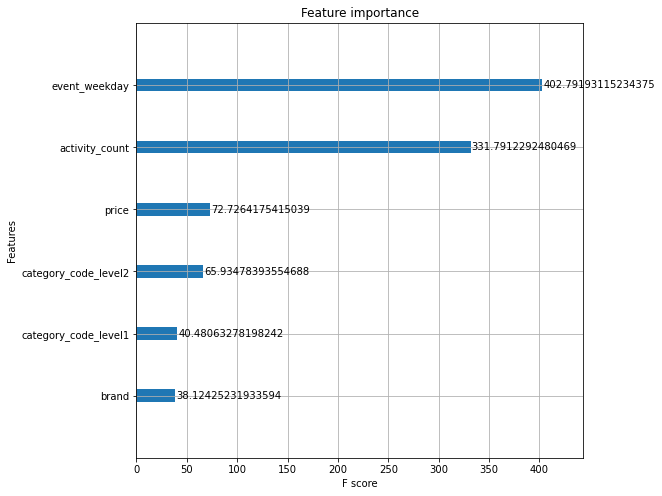

In [38]:
plot_importance(model, max_num_features=10, importance_type ='gain')
plt.rcParams['figure.figsize'] = (40,10)
plt.show()